In [5]:
import pandas as pd 
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('merged.csv')

In [7]:
num_nans = data.isna().sum().sum()
print(num_nans)


48356


In [8]:
data.columns

Index(['Validity', 'Survey', 'MidTime', 'Timestamp', 'ID', 'Location',
       'Productivity', 'Mood', 'Stress', 'Average_ID_30s',
       ...
       'Average_voc_7200s', 'Average_pm10_est_7200s', 'Average_pm25_7200s',
       'Average_timestamp_updated_7200s', 'Average_spl_a_7200s_(below_50_dB)',
       'Average_spl_a_7200s_(above_50_dB)', 'Average_temp_7200s_(below_22C)',
       'Average_temp_7200s_(above_22C)', 'Average_humid_7200s_(below_45%)',
       'Average_humid_7200s_(above_45%)'],
      dtype='object', length=153)

In [9]:
selected_cols = ["MidTime","Timestamp","ID","Location","Productivity","Mood","Stress","Average_lux_30s","Average_spl_a_30s","Average_score_30s","Average_temp_30s","Average_humid_30s","Average_co2_30s","Average_voc_30s","Average_pm10_est_30s","Average_pm25_30s",
                "Average_spl_a_30s_(below_50_dB)","Average_spl_a_30s_(above_50_dB)","Average_temp_30s_(below_22C)","Average_temp_30s_(above_22C)","Average_humid_30s_(below_45%)","Average_humid_30s_(above_45%)",
                "Average_lux_60s","Average_spl_a_60s","Average_score_60s","Average_temp_60s","Average_humid_60s","Average_co2_60s","Average_voc_60s","Average_pm10_est_60s","Average_pm25_60s",      
                "Average_spl_a_60s_(below_50_dB)","Average_spl_a_60s_(above_50_dB)","Average_temp_60s_(below_22C)","Average_temp_60s_(above_22C)","Average_humid_60s_(below_45%)","Average_humid_60s_(above_45%)",
                "Average_lux_120s",'Average_spl_a_120s',"Average_score_120s","Average_temp_120s",'Average_humid_120s',"Average_co2_120s","Average_voc_120s","Average_pm10_est_120s","Average_pm25_120s",           
                "Average_spl_a_120s_(below_50_dB)","Average_spl_a_120s_(above_50_dB)","Average_temp_120s_(below_22C)","Average_temp_120s_(above_22C)","Average_humid_120s_(below_45%)","Average_humid_120s_(above_45%)",
                "Average_lux_300s","Average_spl_a_300s","Average_score_300s","Average_temp_300s","Average_humid_300s","Average_co2_300s","Average_voc_300s","Average_pm10_est_300s","Average_pm25_300s",
                "Average_spl_a_300s_(below_50_dB)","Average_spl_a_300s_(above_50_dB)","Average_temp_300s_(below_22C)","Average_temp_300s_(above_22C)","Average_humid_300s_(below_45%)","Average_humid_300s_(above_45%)",
                "Average_lux_600s","Average_spl_a_600s","Average_score_600s","Average_temp_600s","Average_humid_600s","Average_co2_600s","Average_voc_600s","Average_pm10_est_600s","Average_pm25_600s",
                "Average_spl_a_600s_(below_50_dB)","Average_spl_a_600s_(above_50_dB)","Average_temp_600s_(below_22C)","Average_temp_600s_(above_22C)","Average_humid_600s_(below_45%)","Average_humid_600s_(above_45%)",
                "Average_lux_1800s","Average_spl_a_1800s","Average_score_1800s","Average_temp_1800s","Average_humid_1800s","Average_co2_1800s","Average_voc_1800s","Average_pm10_est_1800s","Average_pm25_1800s",
                "Average_spl_a_1800s_(below_50_dB)","Average_spl_a_1800s_(above_50_dB)","Average_temp_1800s_(below_22C)","Average_temp_1800s_(above_22C)","Average_humid_1800s_(below_45%)","Average_humid_1800s_(above_45%)",
                "Average_lux_3600s","Average_spl_a_3600s","Average_score_3600s","Average_temp_3600s","Average_humid_3600s","Average_co2_3600s","Average_voc_3600s","Average_pm10_est_3600s","Average_pm25_3600s",
                "Average_spl_a_3600s_(below_50_dB)","Average_spl_a_3600s_(above_50_dB)","Average_temp_3600s_(below_22C)","Average_temp_3600s_(above_22C)","Average_humid_3600s_(below_45%)","Average_humid_3600s_(above_45%)",
                "Average_lux_7200s","Average_spl_a_7200s","Average_score_7200s","Average_temp_7200s","Average_humid_7200s","Average_co2_7200s","Average_voc_7200s","Average_pm10_est_7200s","Average_pm25_7200s",
                "Average_spl_a_7200s_(below_50_dB)","Average_spl_a_7200s_(above_50_dB)","Average_temp_7200s_(below_22C)","Average_temp_7200s_(above_22C)","Average_humid_7200s_(below_45%)","Average_humid_7200s_(above_45%)",
                 ]
data = data[selected_cols]

In [10]:
num_nans = data.isna().sum().sum()
print(num_nans)


36360


In [11]:
data.describe()

,Location,Productivity,Mood,Stress,Average_lux_30s,Average_spl_a_30s,Average_score_30s,Average_temp_30s,Average_humid_30s,Average_co2_30s,...,Average_co2_7200s,Average_voc_7200s,Average_pm10_est_7200s,Average_pm25_7200s,Average_spl_a_7200s_(below_50_dB),Average_spl_a_7200s_(above_50_dB),Average_temp_7200s_(below_22C),Average_temp_7200s_(above_22C),Average_humid_7200s_(below_45%),Average_humid_7200s_(above_45%)
count,1490.000000,1451.000000,1482.000000,1355.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,...,1490.000000,1490.000000,1490.000000,1490.000000,458.000000,1032.000000,784.000000,706.000000,183.000000,1307.000000
mean,1.740940,67.416265,66.580972,39.330627,148.630453,51.003623,89.622127,22.368017,53.952060,564.753242,...,553.926275,213.619076,12.253477,10.915993,45.287653,53.179842,20.621916,24.067857,34.334020,57.136490
std,0.438266,21.006281,20.081044,23.730202,948.313451,5.361682,9.223874,2.205169,10.085716,273.941315,...,278.685592,465.625731,44.403683,43.872821,3.990930,2.942576,0.985954,1.506685,7.928356,6.309246
min,1.000000,0.000000,3.000000,0.000000,0.000000,41.300000,45.333333,18.380000,17.957500,400.000000,...,400.000000,20.000000,1.205400,0.000000,41.300000,50.004045,18.537772,22.001576,18.752939,45.002201
25%,1.000000,55.000000,53.000000,18.000000,0.000000,49.533333,87.000000,20.880000,49.650000,427.250000,...,425.680710,56.937674,1.877900,0.664460,41.310728,50.823878,19.682325,23.005421,26.624194,51.829784
50%,2.000000,69.000000,69.000000,34.000000,0.000000,50.966667,92.000000,21.980000,54.966667,456.000000,...,448.419916,92.931508,3.197179,1.967967,43.011900,52.218250,20.908785,23.810477,35.819791,56.975746
75%,2.000000,83.000000,79.000000,60.000000,35.100000,53.466667,96.000000,23.896667,60.643333,543.000000,...,502.452345,145.928603,5.824340,4.563719,49.482680,55.182421,21.457779,24.814963,41.518489,61.734348
max,2.000000,100.000000,100.000000,100.000000,14309.233330,80.166667,100.000000,41.586667,76.506667,2370.666667,...,2403.600559,12048.427580,532.870833,525.309192,49.998036,73.870000,21.998577,32.910893,44.987563,72.541741


In [12]:
data = data.fillna(method='ffill').fillna(method='bfill')


/var/folders/05/052ncv8d7qlfb__v03p6cqlm0000gn/T/ipykernel_27971/3594494089.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


In [13]:
data.describe()

,Location,Productivity,Mood,Stress,Average_lux_30s,Average_spl_a_30s,Average_score_30s,Average_temp_30s,Average_humid_30s,Average_co2_30s,...,Average_co2_7200s,Average_voc_7200s,Average_pm10_est_7200s,Average_pm25_7200s,Average_spl_a_7200s_(below_50_dB),Average_spl_a_7200s_(above_50_dB),Average_temp_7200s_(below_22C),Average_temp_7200s_(above_22C),Average_humid_7200s_(below_45%),Average_humid_7200s_(above_45%)
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,1.741113,67.221328,66.506372,37.949698,146.207499,51.014560,89.607031,22.339389,54.007783,563.410575,...,553.852057,213.608920,12.247339,10.909928,46.868631,52.717173,20.642651,23.344350,38.201439,56.544750
std,0.438170,21.443119,20.137792,23.609423,940.190193,5.317474,9.234574,2.199874,10.041666,273.268804,...,278.606798,465.469620,44.389412,43.858722,3.879885,2.600380,1.006209,1.343211,7.453554,6.534175
min,1.000000,0.000000,3.000000,0.000000,0.000000,41.300000,45.333333,18.380000,17.957500,400.000000,...,400.000000,20.000000,1.205400,0.000000,41.300000,50.004045,18.537772,22.001576,18.752939,45.002201
25%,1.000000,54.000000,53.000000,18.000000,0.000000,49.566667,87.000000,20.815833,49.698333,426.333333,...,425.694290,56.944986,1.878016,0.664575,41.358020,50.902228,19.962863,22.303794,36.782964,51.043463
50%,2.000000,69.000000,69.000000,33.000000,0.000000,51.000000,92.000000,21.930000,55.093333,455.000000,...,448.409471,92.972106,3.197179,1.967967,49.569399,52.295670,20.853380,23.159777,41.473802,56.307465
75%,2.000000,83.000000,79.000000,58.000000,33.115000,53.433333,95.708333,23.861667,60.658333,542.333333,...,502.346194,146.414798,5.822578,4.561978,49.624513,53.367409,21.579840,23.799624,43.833013,61.342723
max,2.000000,100.000000,100.000000,100.000000,14309.233330,80.166667,100.000000,41.586667,76.506667,2370.666667,...,2403.600559,12048.427580,532.870833,525.309192,49.998036,73.870000,21.998577,32.910893,44.987563,72.541741


In [18]:
import statsmodels.api as sm

# Regression analysis
X = data.drop(['Productivity', 'Mood', 'Stress',"MidTime","Timestamp","ID","Location"], axis=1)
X = sm.add_constant(X)

# Regression analysis for Productivity
model_productivity = sm.OLS(data['Productivity'], X).fit()
print(model_productivity.summary())


                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     5.308
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.21e-55
Time:                        10:38:51   Log-Likelihood:                -6401.0
No. Observations:                1491   AIC:                         1.304e+04
Df Residuals:                    1370   BIC:                         1.369e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [19]:

# Regression analysis for Mood
model_mood = sm.OLS(data['Mood'], X).fit()
print(model_mood.summary())


                            OLS Regression Results                            
Dep. Variable:                   Mood   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.771
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           4.63e-62
Time:                        10:38:53   Log-Likelihood:                -6287.0
No. Observations:                1491   AIC:                         1.282e+04
Df Residuals:                    1370   BIC:                         1.346e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [20]:

# Regression analysis for Stress
model_stress = sm.OLS(data['Stress'], X).fit()
print(model_stress.summary())


                            OLS Regression Results                            
Dep. Variable:                 Stress   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     9.178
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          1.24e-108
Time:                        10:38:54   Log-Likelihood:                -6389.4
No. Observations:                1491   AIC:                         1.302e+04
Df Residuals:                    1370   BIC:                         1.366e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [61]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

In [62]:
data.dtypes

MidTime                                      object
Timestamp                            datetime64[ns]
ID                                           object
Location                                    float64
Productivity                                float64
                                          ...      
Average_spl_a_7200s_(above_50_dB)           float64
Average_temp_7200s_(below_22C)              float64
Average_temp_7200s_(above_22C)              float64
Average_humid_7200s_(below_45%)             float64
Average_humid_7200s_(above_45%)             float64
Length: 127, dtype: object

In [63]:
import datetime

data['Day'] = data['Timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [64]:
import json

def calculate_sma(data, window):
    sma_features = []
    for i in range(len(data)):
        if i < window:
            sma = np.mean(data[:i+1])
        else:
            sma = np.mean(data[i-window+1:i+1])
        sma_features.append(sma)
    return sma_features

def get_hr_data(path):
    with open(path) as file:
        data = json.load(file)
    data = data['activities-heart-intraday']["dataset"]
    data = pd.DataFrame(data)
    if data.empty:
        raise ValueError("No data found in the file")
    data["sma_5"] = calculate_sma(data["value"], 5)
    data["sma_10"] = calculate_sma(data["value"], 10)
    data["sma_15"] = calculate_sma(data["value"], 15)
    data["sma_30"] = calculate_sma(data["value"], 30)
    data["sma_60"] = calculate_sma(data["value"], 60)
    data["sma_120"] = calculate_sma(data["value"], 120)
    data["sma_300"] = calculate_sma(data["value"], 300)
    data = data.to_numpy()
    return data

In [65]:
def get_hr_path(x):
    t = x["Timestamp"].strftime('%Y-%m-%d')
    fname = t+'_hr.json'
    tid = x["ID"]
    fpath = './'+tid+"/fitbit_data/"+fname
    return fpath

In [16]:
data["hr_path"] = data.apply(get_hr_path, axis=1)
data_arr = []
for i in list(data["hr_path"]):
    try:
        if os.path.exists(i):
            data_arr.append(get_hr_data(i))
        else:
            print("File not found")
    except Exception as e:
        print("Error: "+str(e))

        continue

File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not found
File not f

KeyboardInterrupt: 

In [66]:
def get_audio_img(path):
    cols = ["mfcc[1]","mfcc[2]","mfcc[3]","mfcc[4]","mfcc[5]","mfcc[6]","mfcc[7]","mfcc[8]","mfcc[9]","mfcc[10]","mfcc[11]","mfcc[12]"]
    data = pd.read_csv(path,sep=';',usecols=cols)
    mfcc_image = data.to_numpy()
    # mfcc_image = mfcc_image / np.max(mfcc_image)
    # mfcc_image = np.resize(mfcc_image, (224, 224))
    return mfcc_image

In [67]:
def get_audio_path(x):
    t_d = x["Timestamp"].strftime('%Y-%m-%d')
    t_t = x["Timestamp"].strftime('%H-%M-%S')
    root_path = "./"+x["ID"]+"/audio/"+t_d+"/csv/"
    
    fnames = os.listdir(root_path)
    target_timestamp = datetime.datetime.strptime(t_t, '%H-%M-%S')
    print(target_timestamp)
    fnames.remove('.DS_Store')
    print(datetime.datetime.strptime(fnames[0].split('_')[-1][:-4], '%H-%M-%S'))
    ts = [datetime.datetime.strptime(i.split('_')[-1][:-4], '%H-%M-%S') for i in fnames]
    closest_timestamp = min(ts, key=lambda x: abs(x - target_timestamp))
    print(closest_timestamp)
    
    fpath = root_path+(fnames[ts.index(closest_timestamp)])
    return fpath

In [ ]:
data["audio_path"] = data.apply(get_audio_path, axis=1)

In [68]:
path = "./ID104/audio/2023-08-14/csv/audio_C300000A0E84_18-01-36.csv"
mfcc_im  = get_audio_img(path)

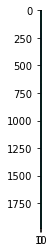

In [69]:
plt.imshow(mfcc_im)
plt.show()

In [72]:
mfcc_im.shape

(1975, 12)

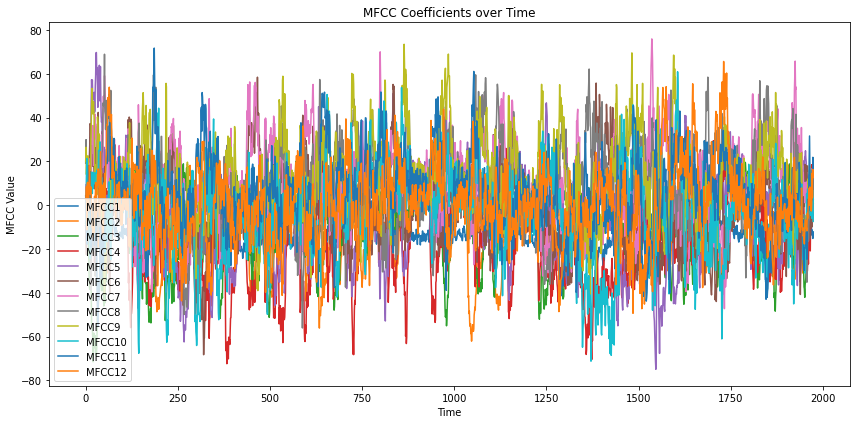

In [73]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(1, 13):
  plt.plot(mfccs[:, i-1], label=f'MFCC{i}')
plt.xlabel('Time')
plt.ylabel('MFCC Value')
plt.title('MFCC Coefficients over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
import librosa

mfccs = mfcc_im
sr = 22050  # Assuming sampling rate (adjust as needed)
spec = librosa.feature.inverse.mel_to_spec(mfccs, sr=sr, n_mels=20)  # Adjust n_mels as needed

# Use librosa.display.specshow or other visualization libraries to display the spectrogram
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='mel', fmax=8000)  # Adjust parameters as needed
plt.colorbar(format="%+2.f dB")
plt.title('Approximate Mel Spectrogram (from MFCCs)')
plt.tight_layout()
plt.show()


AttributeError: module 'numpy.linalg.lapack_lite' has no attribute '_ilp64'